In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import KDTree

In [ ]:
#@title Download and extract the dataset
! gdown --id 1BRp3cm_IZ0IJsBP-kvBh43qQGOilehQ1
! unzip -q HCP-Gambling.zip
% cd content/hcp
regions = np.load('/content/content/hcp/regions.npy')

Downloading...
From: https://drive.google.com/uc?id=1BRp3cm_IZ0IJsBP-kvBh43qQGOilehQ1
To: /content/HCP-Gambling.zip
183MB [00:01, 111MB/s] 
/content/content/hcp


In [ ]:
def load_single_timeseries(subject , run, experiment="GAMBLING" , remove_mean=True):
  """Load timeseries data for a single subject and single run.
  
  Args:
    subject (int):      0-based subject ID to load
    experiment (str):   Name of experiment 
    run (int):          0-based run index, across all tasks
    remove_mean (bool): If True, subtract the parcel-wise mean (typically the mean BOLD signal is not of interest)

  Returns
    ts (n_parcel x n_timepoint array): Array of BOLD data values

  """

  bold_path = f"./subjects/{subject}/timeseries"
  bold_file = f"bold{run}_Atlas_MSMAll_Glasser360Cortical.npy"
  ts = np.load(f"{bold_path}/{bold_file}")
  if remove_mean:
    ts -= ts.mean(axis=1, keepdims=True)
  
  return ts

In [ ]:
# loading timeseries into dataframe with each row representing a participant and rows run_0 and run_1 
# respectively corresponding to each run for the participant
# we choose not to separate data for each brain region as it would have made for 700 something columns 

df = pd.DataFrame()

for subject in range(339):
  run_0 = load_single_timeseries(subject=subject, run= 11, remove_mean=True)
  # run_1= load_single_timeseries(subject=12 , run= 12, remove_mean=True)
  run_1= load_single_timeseries(subject=subject , run= 12, remove_mean=True)
  df = df.append(pd.DataFrame([{'run_0': run_0, 'run_1':run_1}]), ignore_index=True)

df

,run_0,run_1
0,"[[11.539920948616782, 13.939920948616418, -34....","[[-34.47193675889321, -107.37193675889284, -15..."
1,"[[-0.7131225296434422, -9.253122529644315, -3....","[[-39.62474308300625, -72.64474308300487, -61...."
2,"[[-61.846245059288776, -80.74624505928841, -92...","[[-13.730039525691609, -23.23003952569161, -50..."
3,"[[-15.198418972331638, -46.09841897233309, -53...","[[196.7031620553371, 182.7031620553371, 141.60..."
4,"[[505.7127667984205, 522.2127667984205, 597.41...","[[-642.6058102766801, -593.7058102766805, -116..."
...,...,...
334,"[[-10.596442687747185, 14.303557312252451, 20....","[[21.380632411066472, -57.019367588933164, -10..."
335,"[[-11.157312252962583, -25.957312252963675, -3...","[[39.58932806323901, 43.789328063239736, 18.58..."
336,"[[-15.475889328063204, -47.975889328063204, -7...","[[115.15138339921032, 50.15138339921032, 27.05..."
337,"[[-38.58339920948674, -117.08339920948674, -98...","[[34.316600790512894, -7.883399209487834, -53...."


In [ ]:
t_vec = np.arange(0,df.iloc[1][0][0].shape[0])*0.72
t_vec

array([  0.  ,   0.72,   1.44,   2.16,   2.88,   3.6 ,   4.32,   5.04,
         5.76,   6.48,   7.2 ,   7.92,   8.64,   9.36,  10.08,  10.8 ,
        11.52,  12.24,  12.96,  13.68,  14.4 ,  15.12,  15.84,  16.56,
        17.28,  18.  ,  18.72,  19.44,  20.16,  20.88,  21.6 ,  22.32,
        23.04,  23.76,  24.48,  25.2 ,  25.92,  26.64,  27.36,  28.08,
        28.8 ,  29.52,  30.24,  30.96,  31.68,  32.4 ,  33.12,  33.84,
        34.56,  35.28,  36.  ,  36.72,  37.44,  38.16,  38.88,  39.6 ,
        40.32,  41.04,  41.76,  42.48,  43.2 ,  43.92,  44.64,  45.36,
        46.08,  46.8 ,  47.52,  48.24,  48.96,  49.68,  50.4 ,  51.12,
        51.84,  52.56,  53.28,  54.  ,  54.72,  55.44,  56.16,  56.88,
        57.6 ,  58.32,  59.04,  59.76,  60.48,  61.2 ,  61.92,  62.64,
        63.36,  64.08,  64.8 ,  65.52,  66.24,  66.96,  67.68,  68.4 ,
        69.12,  69.84,  70.56,  71.28,  72.  ,  72.72,  73.44,  74.16,
        74.88,  75.6 ,  76.32,  77.04,  77.76,  78.48,  79.2 ,  79.92,
      

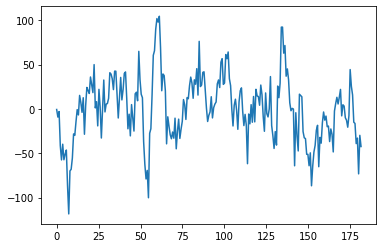

In [ ]:
# number of arrays in each column (run_0 or run_1) for each participant
plt.plot(t_vec, df.iloc[1][0][0]);
 # histogram of time series for a region

In [ ]:
[]
#8.063 - 36.847: loss
#51.952 - 80.749: win
#95.855 - 124.611: loss
#139.717 - 168.487: win

[]

In [ ]:
win_loss_df = pd.DataFrame()

for i in range(339):

  part_row_df = pd.DataFrame()

  for j in range(2):
    dat = df.iloc[i][j]

    #8.063 - 36.847: loss
    #51.952 - 80.749: win
    #95.855 - 124.611: loss
    #139.717 - 168.487: win
    kdt = KDTree(t_vec.reshape(-1,1))
    _,los_ind1 =kdt.query(np.array([8.063])) 
    _,los_ind2 =kdt.query(np.array([36.847]))
    _,win_ind1 =kdt.query(np.array([51.952]))  
    _,win_ind2 =kdt.query(np.array([80.749]))

    _,los_ind3 =kdt.query(np.array([95.855])) 
    _,los_ind4 =kdt.query(np.array([124.611])) 
    _,win_ind3 =kdt.query(np.array([139.717]))
    _,win_ind4 =kdt.query(np.array([168.487]))  


    los1_sig = np.zeros_like(dat[0,los_ind1:los_ind2]).reshape(1,-1)
    los2_sig = np.zeros_like(dat[0,los_ind3:los_ind4]).reshape(1,-1)
    win1_sig = np.zeros_like(dat[0,win_ind1:win_ind2]).reshape(1,-1)
    win2_sig = np.zeros_like(dat[0,win_ind3:win_ind4]).reshape(1,-1)
    for regi in range(360):
      tmp_sig = dat[regi,:]
      los_1 = tmp_sig[los_ind1:los_ind2].reshape(1,-1)
      los_2 = tmp_sig[los_ind3:los_ind4].reshape(1,-1)
      win_1 = tmp_sig[win_ind1:win_ind2].reshape(1,-1)
      win_2 = tmp_sig[win_ind3:win_ind4].reshape(1,-1)

      los1_sig = np.concatenate((los1_sig,los_1),axis=0)
      los2_sig = np.concatenate((los2_sig,los_2),axis=0)
      win1_sig = np.concatenate((win1_sig,win_1),axis=0)
      win2_sig = np.concatenate((win2_sig,win_2),axis=0)

    los1_sig = los1_sig[1:,:]
    los2_sig = los2_sig[1:,:]
    win1_sig = win1_sig[1:,:]
    win2_sig = win2_sig[1:,:]

    run_win_loss_df = pd.DataFrame([{"los1":los1_sig, "los2":los2_sig,"win1":win1_sig,"win2":win2_sig}])
    part_row_df = pd.concat ([part_row_df, run_win_loss_df], axis=1)

  win_loss_df = win_loss_df.append(part_row_df, ignore_index=True)


In [ ]:
win_loss_df.columns = ["r1_los1", "r1_los2", "r1_win1", "r1_win2", "r2_los1", "r2_los2", "r2_win1", "r2_win2"]

In [ ]:
win_loss_df

,r1_los1,r1_los2,r1_win1,r1_win2,r2_los1,r2_los2,r2_win1,r2_win2
0,"[[-250.36007905138285, -214.2600790513825, -21...","[[-21.160079051383946, -22.360079051382854, -3...","[[-27.560079051383582, 2.7399209486175096, -32...","[[17.039920948616782, -18.660079051383946, -12...","[[-191.07193675889175, -228.77193675889248, -1...","[[-168.4719367588932, -93.47193675889321, -67....","[[-85.17193675889212, -98.87193675889284, -92....","[[-101.77193675889248, -125.47193675889321, -9..."
1,"[[-70.03312252964497, -68.14312252964373, -55....","[[28.21687747035503, 32.60687747035627, 24.036...","[[-36.97312252964366, -62.46312252964344, -79....","[[-2.103122529644679, 0.5568774703551753, -0.1...","[[-19.104743083005815, 0.3052569169940398, -60...","[[-45.77474308300589, -15.094743083005596, -24...","[[-30.174743083005524, 5.215256916993894, -13....","[[13.285256916993603, -37.40474308300509, -80...."
2,"[[-108.54624505928768, -135.04624505928768, -1...","[[-100.04624505928768, -113.94624505928732, -1...","[[-125.14624505928805, -146.14624505928805, -1...","[[-36.94624505928732, -44.64624505928805, -64....","[[-46.93003952569234, -76.83003952569197, -86....","[[-120.03003952569088, -129.83003952569197, -7...","[[-47.53003952569088, -29.430039525692337, -15...","[[-73.13003952569125, -106.53003952569088, -77..."
3,"[[-35.398418972332365, -37.09841897233309, -60...","[[-92.59841897233309, -49.49841897233273, -69....","[[-68.59841897233309, -77.39841897233237, -71....","[[-108.59841897233309, -134.0984189723331, -12...","[[78.30316205533745, 19.00316205533818, 1.6031...","[[-2.6968379446625477, -10.796837944662911, -4...","[[-3.096837944662184, 0.7031620553370885, -17....","[[-169.7968379446629, -163.99683794466182, -13..."
4,"[[249.11276679842013, 232.11276679842013, 256....","[[-101.48723320158024, -86.78723320157951, -10...","[[-128.7872332015795, -120.38723320157987, -12...","[[-102.38723320157987, -131.48723320158024, -1...","[[33.19418972331914, 157.19418972331914, 129.5...","[[106.39418972331987, -506.0058102766816, 63.4...","[[142.59418972331878, 195.9941897233184, 219.5...","[[13.994189723318414, 15.794189723319505, 63.9..."
...,...,...,...,...,...,...,...,...
334,"[[-73.09644268774719, -31.796442687747913, -16...","[[-64.79644268774791, -79.89644268774828, -32....","[[24.103557312251723, -23.096442687747185, -34...","[[-212.59644268774719, -210.89644268774828, -1...","[[27.380632411066472, 9.5806324110672, -9.6193...","[[64.78063241106611, -33.61936758893353, -10.9...","[[-44.11936758893353, -36.519367588933164, -63...","[[-124.9193675889328, -30.719367588933892, -11..."
335,"[[-112.25731225296295, -159.65731225296258, -1...","[[-23.35731225296331, -36.25731225296295, -58....","[[-14.557312252964039, -13.957312252963675, -1...","[[-76.45731225296367, -51.75731225296295, -62....","[[-42.6106719367599, -46.710671936760264, -44....","[[-92.41067193676099, -49.91067193676099, -80....","[[-13.510671936759536, -55.81067193676063, -19...","[[-28.710671936760264, -51.710671936760264, -8..."
336,"[[-71.7758893280643, -100.7758893280643, -113....","[[-82.2758893280643, -74.4758893280632, -76.47...","[[-92.67588932806393, -44.07588932806357, -108...","[[-33.37588932806466, -43.67588932806393, -76....","[[64.15138339921032, 52.05138339920995, -15.94...","[[-132.5486166007904, -163.44861660079005, -15...","[[-121.84861660078968, -127.44861660079005, -1...","[[-79.54861660079041, -54.74861660078932, -81...."
337,"[[-40.58339920948674, -76.88339920948602, -70....","[[-41.183399209487106, -25.083399209486743, -3...","[[-20.78339920948747, -59.883399209486015, -49...","[[-16.183399209487106, 0.3166007905128936, -14...","[[-52.183399209487106, -61.78339920948747, -67...","[[-40.28339920948747, -64.08339920948674, -43....","[[-70.9833992094882, -93.88339920948783, -84.8...","[[-5.983399209488198, -2.0833992094867426, -1...."


In [ ]:
win_loss_dff = pd.DataFrame()

In [ ]:
win_loss_df.columns

Index(['r1_los1', 'r1_los2', 'r1_win1', 'r1_win2', 'r2_los1', 'r2_los2',
       'r2_win1', 'r2_win2'],
      dtype='object')

In [ ]:
win_loss_dff["r_los"] = pd.concat([win_loss_df["r1_los1"], win_loss_df["r1_los2"],win_loss_df["r2_los1"], win_loss_df["r2_los2"]])
win_loss_dff["r_win"] = pd.concat([win_loss_df["r1_win1"], win_loss_df["r1_win2"], win_loss_df["r2_win1"], win_loss_df["r2_win2"]])
# win_loss_dff["r2_los"] = pd.concat([win_loss_df["r2_los1"], win_loss_df["r2_los2"]])
# win_loss_dff["r2_win"] = pd.concat([win_loss_df["r2_win1"], win_loss_df["r2_win2"]])

# win_loss_dff["los"] = pd.concat([win_loss_dff["r1_los"],win_loss_dff["r2_los"]])
# win_loss_dff["win"] = pd.concat([win_loss_dff["r1_win"],win_loss_dff["r2_win"]])

win_loss_df = win_loss_dff.copy()

In [ ]:
win_loss_dff.shape

(1356, 2)

In [ ]:
import scipy.stats as stats

In [ ]:
def perm_test(data1,data2,niteration):

  tmp_dat1 = data1
  tmp_dat2 = data2

  tmp_dif  = tmp_dat2 - tmp_dat1

  for pat in range(tmp_dat1.shape[0]):
    tmp_dif.iloc[pat] = np.mean(tmp_dif.iloc[pat], axis=1)
  tmp_tot  = pd.Series(np.concatenate((tmp_dat1, tmp_dat2),axis=0))

  mean_df1 = np.zeros((360,1))


  for pat in range(tmp_dat1.shape[0]):
     mean_df1 = np.concatenate((mean_df1, np.array(tmp_dif.iloc[pat]).reshape(360,1)),axis=1 )

  mean_df1 = mean_df1[:,1:]
    
  # mean_df1 = np.concatenate((mean_df1, np.array(ev_df.iloc[pat,1]).reshape(360,1)),axis=1 )
  orig_t = np.zeros(360)

  for reg in range(360):
    orig_t[reg] = stats.ttest_1samp(mean_df1[reg,:],0.0)[0]

  niter = niteration
  t_dist = np.zeros((360,niter))

  for ii in range(niter):
    print(f"Iteration: {ii}")
    tmp_ind = np.random.permutation(tmp_tot.shape[0])
    tmp_ind1 = tmp_ind[:tmp_dat1.shape[0]]
    tmp_ind2 = tmp_ind[tmp_dat1.shape[0]:]
    dat1 = tmp_tot[tmp_ind1]
    dat2 = tmp_tot[tmp_ind2]

    dif = pd.Series(np.array(dat2) - np.array(dat1))

    for pat in range(dat1.shape[0]):
      dif.iloc[pat] = np.mean(dif.iloc[pat], axis=1)

    mean_dff1 = np.zeros((360,1))


    for pat in range(tmp_dat1.shape[0]):
      mean_dff1 = np.concatenate((mean_dff1, np.array(dif.iloc[pat]).reshape(360,1)),axis=1 )

    mean_dff1 = mean_dff1[:,1:]
    for reg in range(360):
      t_dist[reg,ii] = stats.ttest_1samp(mean_dff1[reg,:],0.0)[0]
    
  p_vals = np.zeros(360)
  sig_p = []

  for reg in range(360):
    p_vals[reg] = np.sum(np.abs(t_dist[reg,:])> np.abs(orig_t[reg]))/niter 
    if np.sum(np.abs(t_dist[reg,:])> np.abs(orig_t[reg]))/niter <0.01:
      print(f"reg {reg} p-value: {np.sum(np.abs(t_dist[reg,:])> np.abs(orig_t[reg]))/niter}")
      sig_p.append(reg)
    else: 
      continue

  return {"p_vals":p_vals, "sig_p": sig_p}

In [ ]:

def averager(dat):
  data = dat
  for pat in range(data.shape[0]):
    data.iloc[pat] = np.mean(data.iloc[pat],axis=1)
  
  return data


In [ ]:
data1

0      [-32.0800790513832, 19.05000988142342, -29.315...
1      [4.903877470355747, 21.08124110671954, 25.0643...
2      [8.071254940711878, 31.55055632411081, 5.10467...
3      [41.54158102766765, 21.613609683795993, 72.176...
4      [292.0752667984198, 78.40611660079108, 14.6866...
                             ...                        
334    [8.8206324110668, -3.696166996046986, 14.37099...
335    [17.156828063239526, -0.23089920948855253, 5.3...
336    [-4.306116600790074, -32.59477272727222, -31.6...
337    [22.87160079051255, 11.855501976283676, 22.988...
338    [12.346383399209936, 6.832839920949027, 0.8197...
Name: r_los, Length: 1356, dtype: object

In [ ]:
data1 = win_loss_df["r_los"].copy()
data2 = win_loss_df["r_win"].copy()
niteration = 20

kk = perm_test(data1, data2, niteration)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
reg 0 p-value: 0.0
reg 1 p-value: 0.0
reg 5 p-value: 0.0
reg 6 p-value: 0.0
reg 8 p-value: 0.0
reg 9 p-value: 0.0
reg 10 p-value: 0.0
reg 11 p-value: 0.0
reg 14 p-value: 0.0
reg 15 p-value: 0.0
reg 16 p-value: 0.0
reg 17 p-value: 0.0
reg 18 p-value: 0.0
reg 19 p-value: 0.0
reg 20 p-value: 0.0
reg 21 p-value: 0.0
reg 22 p-value: 0.0
reg 23 p-value: 0.0
reg 24 p-value: 0.0
reg 25 p-value: 0.0
reg 26 p-value: 0.0
reg 27 p-value: 0.0
reg 28 p-value: 0.0
reg 30 p-value: 0.0
reg 31 p-value: 0.0
reg 32 p-value: 0.0
reg 35 p-value: 0.0
reg 36 p-value: 0.0
reg 37 p-value: 0.0
reg 39 p-value: 0.0
reg 40 p-value: 0.0
reg 42 p-value: 0.0
reg 43 p-value: 0.0
reg 44 p-value: 0.0
reg 45 p-value: 0.0
reg 46 p-value: 0.0
reg 47 p-value: 

In [ ]:
kk = averager(data1)

In [ ]:
len(kk["sig_p"])

In [ ]:
los_mean = averager(data1)
win_mean = averager(data2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# extract values => scale data
los_vals = los_mean.values
los_mat = np.zeros((los_vals.shape[0], 360))
for ii in range(los_vals.shape[0]):
  los_mat[ii,:] = los_vals[ii]
x_los = los_mat[:,kk["sig_p"]]

In [ ]:
win_vals = win_mean.values
win_mat = np.zeros((win_vals.shape[0], 360))
for ii in range(win_vals.shape[0]):
  win_mat[ii,:] = win_vals[ii]

x_win = win_mat[:,kk["sig_p"]]

In [ ]:
y = np.concatenate((np.zeros(x_los.shape[0]), np.ones(x_win.shape[0]))) # class0: loss class1: win

In [ ]:
x = np.concatenate((x_los, x_win))

In [ ]:
np.random.permutation(x.shape[0])

In [ ]:
# Shuffle
ind = np.random.permutation(x.shape[0])
x = x[ind,:]
y = y[ind]

In [ ]:
# Scale
sclr = StandardScaler()
x_scl = sclr.fit_transform(x)

In [ ]:
predictr = LogisticRegression(penalty="elasticnet", solver='saga', max_iter=10000,l1_ratio=0.5)

In [ ]:
predictr.fit(x_scl,y)

In [ ]:
from sklearn.metrics import classification_report, plot_roc_curve

In [ ]:
y_pred = predictr.predict(x_scl)

In [ ]:
report = classification_report(y, y_pred, output_dict=True)
report = pandas.DataFrame(report)

In [ ]:
 plt.figure(figsize=(10,5))
 plot_roc_curve(predictr, x_scl,y)
 plt.plot([0,1],[0,1], 'k--')

In [ ]:
from sklearn.model_selection import cross_val_predict,cross_validate

In [ ]:
!pip install  scikit-plot

In [ ]:
import  scikitplot as sklp

In [ ]:
# SVM

from sklearn.svm import SVC

In [ ]:
svm_pred = SVC(probability=True)

In [ ]:
svm_pred.fit(x_scl,y)

In [ ]:
ysvm_pred = svm_pred.predict(x_scl)

In [ ]:
print(classification_report(y,ysvm_pred))

In [ ]:
scores = cross_validate(svm_pred,x_scl,y,cv=10,scoring='roc_auc')

In [ ]:
scores

In [ ]:
ycv_pred = cross_val_predict(svm_pred,x_scl,y,cv=10, method='predict_proba') # predictions from cross validation

In [ ]:
# plor roc from cross validated model
sklp.metrics.plot_roc_curve(y,ycv_pred)

In [ ]:
def ev_minus(dat1,dat2):
  return dat1-dat2
ev_df = pd.DataFrame()
ev_df["r1_lw1"] = ev_minus(win_loss_df["r1_los1"], win_loss_df["r1_win1"])
ev_df["r1_lw2"] = ev_minus(win_loss_df["r1_los2"], win_loss_df["r1_win2"])
ev_df["r2_lw1"] = ev_minus(win_loss_df["r2_los1"], win_loss_df["r2_win1"])
ev_df["r2_lw2"] = ev_minus(win_loss_df["r2_los2"], win_loss_df["r2_win2"])
ev_df

In [ ]:
for pat in range(339):
  for col in range(4):
    ev_df.iloc[pat,col] = np.mean(ev_df.iloc[pat,col],axis=1)

In [ ]:
ev_df

In [ ]:
import scipy.stats as stats

In [ ]:
mean_df1 = np.zeros((360,1))
mean_df2 = np.zeros((360,1))
mean_df3 = np.zeros((360,1))
mean_df4 = np.zeros((360,1))
mean_dic = {"df1":mean_df1, "df2": mean_df2, "df3": mean_df3, "df4": mean_df4}

for pat in range(339):
  for ii in range(1,5):
    tmp_nam = "df"+ str(ii) 
    mean_dic[tmp_nam] = np.concatenate((mean_dic[tmp_nam], np.array(ev_df.iloc[pat,1]).reshape(360,1)),axis=1 )
    
  # mean_df1 = np.concatenate((mean_df1, np.array(ev_df.iloc[pat,1]).reshape(360,1)),axis=1 )
for ii in range(1,5):
  tmp_nam = "df"+ str(ii)
  mean_dic[tmp_nam] = mean_dic[tmp_nam][:,1:]
    

In [ ]:
tmp_dat = mean_dic["df1"]

for reg in range(360):
  pprint.pprint(f"reg {reg} P: {stats.ttest_1samp(tmp_dat[reg,:],0.0)[1]}")

In [ ]:
tmp_dat = mean_dic["df1"]

for reg in range(360):
  if stats.ttest_1samp(tmp_dat[reg,:],0.0)[1]<0.01 :
    pprint.pprint(f"reg {reg} P: {stats.ttest_1samp(tmp_dat[reg,:],0.0)[1]}")

In [ ]:
# having features (mean of brain region activity values) and labels (win/loss) for each experiment 
# now we can apply a classifier upon the data for regions with significant difference in levels of activity

mean_win_loss = pd.DataFrame()


mean_win_loss['win'] = pd.concat([win_loss_df['r1_win1'], win_loss_df['r1_win2'], win_loss_df['r2_win1'], win_loss_df['r2_win2']], ignore_index=True)
mean_win_loss['loss'] = pd.concat([win_loss_df['r1_los1'], win_loss_df['r1_los2'], win_loss_df['r2_los1'], win_loss_df['r2_los2']], ignore_index=True)


mean_win_loss['win'] =  [np.mean(x,axis = 1) for x in mean_win_loss['win'] ]
mean_win_loss['loss'] =  [np.mean(x,axis = 1) for x in mean_win_loss['loss'] ]
mean_win_loss

In [ ]:
win_mean_activity = mean_win_loss['win'][:].mean()
loss_mean_activity = mean_win_loss['loss'][:].mean()

In [ ]:
win_var = [np.var(x) for x in mean_win_loss['win']]
loss_var = [np.var(x) for x in mean_win_loss['win']]

In [ ]:
print("mean loss var: ", np.var(loss_mean_activity), "mean win var: ",np.var(win_mean_activity)) 

fig, axs = plt.subplots(2,sharex=True, sharey=True)

axs[0].plot(loss_mean_activity,label='loss')
axs[1].plot(win_mean_activity,label='win')
axs[0].title.set_text('Loss mean activity')
axs[1].title.set_text('Win mean activity')


plt.savefig("win_loss_mean.png",dpi=400)

In [ ]:
win_loss_diff = loss_mean_activity -  win_mean_activity

!pip install nilearn --quiet
from nilearn import plotting, datasets

# NMA provides an atlas 
fname = f"./atlas.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/j5kuc/download
with np.load(fname) as dobj:
  atlas = dict(**dobj)


fsaverage = datasets.fetch_surf_fsaverage()
surf_contrast = win_loss_diff[atlas["labels_L"]]
plotting.view_surf(fsaverage['infl_left'],
                   surf_contrast,
                   vmax=20)